# Author
## Lingga Rohadyan
Dicoding Belajar Pengembangan Machine Learning

Proyek Pertama : Membuat Model NLP dengan TensorFlow


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
dataset1 = pd.read_csv('/content/1429_1.csv', engine='python', error_bad_lines=False)
dataset2 = pd.read_csv('/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv', engine='python', error_bad_lines=False)
dataset3 = pd.read_csv('/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv', engine='python', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df = pd.concat([dataset1, dataset2, dataset3])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67992 entries, 0 to 28331
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    67992 non-null  object 
 1   name                  61232 non-null  object 
 2   asins                 67990 non-null  object 
 3   brand                 67992 non-null  object 
 4   categories            67992 non-null  object 
 5   keys                  67992 non-null  object 
 6   manufacturer          67992 non-null  object 
 7   reviews.date          67953 non-null  object 
 8   reviews.dateAdded     25091 non-null  object 
 9   reviews.dateSeen      67992 non-null  object 
 10  reviews.didPurchase   10 non-null     object 
 11  reviews.doRecommend   55152 non-null  object 
 12  reviews.id            71 non-null     float64
 13  reviews.numHelpful    55246 non-null  float64
 14  reviews.rating        67959 non-null  float64
 15  reviews.sourceURLs 

In [5]:
df.isnull().sum()

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       42901
reviews.dateSeen            0
reviews.didPurchase     67982
reviews.doRecommend     12840
reviews.id              67921
reviews.numHelpful      12746
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title              18
reviews.userCity        67992
reviews.userProvince    67992
reviews.username            2
dateAdded               34660
dateUpdated             34660
primaryCategories       34660
imageURLs               34660
manufacturerNumber      34660
sourceURLs              34660
dtype: int64

In [6]:
df['reviews.rating'] = df['reviews.rating'].fillna('Missing')
df['reviews.text'] = df['reviews.text'].fillna('Missing')

In [7]:
df.isnull().sum()

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       42901
reviews.dateSeen            0
reviews.didPurchase     67982
reviews.doRecommend     12840
reviews.id              67921
reviews.numHelpful      12746
reviews.rating              0
reviews.sourceURLs          0
reviews.text                0
reviews.title              18
reviews.userCity        67992
reviews.userProvince    67992
reviews.username            2
dateAdded               34660
dateUpdated             34660
primaryCategories       34660
imageURLs               34660
manufacturerNumber      34660
sourceURLs              34660
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67992 entries, 0 to 28331
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    67992 non-null  object 
 1   name                  61232 non-null  object 
 2   asins                 67990 non-null  object 
 3   brand                 67992 non-null  object 
 4   categories            67992 non-null  object 
 5   keys                  67992 non-null  object 
 6   manufacturer          67992 non-null  object 
 7   reviews.date          67953 non-null  object 
 8   reviews.dateAdded     25091 non-null  object 
 9   reviews.dateSeen      67992 non-null  object 
 10  reviews.didPurchase   10 non-null     object 
 11  reviews.doRecommend   55152 non-null  object 
 12  reviews.id            71 non-null     float64
 13  reviews.numHelpful    55246 non-null  float64
 14  reviews.rating        67992 non-null  object 
 15  reviews.sourceURLs 

In [9]:
reviews=pd.concat([df['reviews.text'],df['reviews.rating']], axis=1)
reviews.head()

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


In [10]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67992 entries, 0 to 28331
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews.text    67992 non-null  object
 1   reviews.rating  67992 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [11]:
reviews['reviews.rating'].value_counts()

5.0        47150
4.0        15397
3.0         2902
1.0         1438
2.0         1072
Missing       33
Name: reviews.rating, dtype: int64

In [12]:
new_review = reviews[reviews['reviews.rating'] != 'http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=36,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=69,http://reviews.bestbuy.com/3545/5538501/reviews.htm?format=embedded&page=100,http://reviews.bestbuy.com/3545/5538501/reviews.htm?format=embedded&page=34,http://reviews.bestbuy.com/3545/5538501/reviews.htm?format=embedded&page=69']
new_review

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0
...,...,...
28327,I got 2 of these for my 8 yr old twins. My 11 ...,5.0
28328,I bought this for my niece for a Christmas gif...,4.0
28329,"Very nice for light internet browsing, keeping...",5.0
28330,This Tablet does absolutely everything I want!...,5.0


In [13]:
new_review['reviews.rating'].value_counts()

5.0        47150
4.0        15397
3.0         2902
1.0         1438
2.0         1072
Missing       33
Name: reviews.rating, dtype: int64

In [14]:
review = new_review.replace({5.0 : 5, 4.0 : 4, 3.0 : 3, 2.0 : 2, 1.0 : 1, '5' : 5, '4' : 4, '3' : 3, '2' : 2, '1' : 1})

In [15]:
review

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5
1,great for beginner or experienced person. Boug...,5
2,Inexpensive tablet for him to use and learn on...,5
3,I've had my Fire HD 8 two weeks now and I love...,4
4,I bought this for my grand daughter when she c...,5
...,...,...
28327,I got 2 of these for my 8 yr old twins. My 11 ...,5
28328,I bought this for my niece for a Christmas gif...,4
28329,"Very nice for light internet browsing, keeping...",5
28330,This Tablet does absolutely everything I want!...,5


In [16]:
review['reviews.rating'].value_counts()

5          47150
4          15397
3           2902
1           1438
2           1072
Missing       33
Name: reviews.rating, dtype: int64

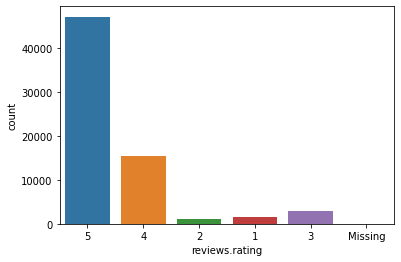

In [17]:
sns.countplot(data = review, x = 'reviews.rating')
plt.show()

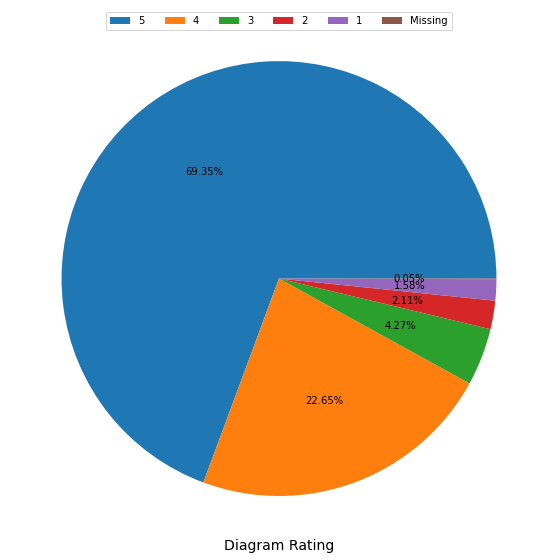

In [18]:
plt.figure(figsize = (10, 10))
label=[5,4,3,2,1,'Missing']
plt.pie(review['reviews.rating'].value_counts(), autopct='%0.2f%%')
plt.legend(label, ncol=6, loc=9)
plt.title('Diagram Rating', size=14, y=-0.01)
plt.show()

In [19]:
labels = {'Missing' : 'Missing',
          1: 0,
          2: 0,
          3: 1,
          4: 2,
          5: 2}

In [20]:
review['reviews.rating'] = review['reviews.rating'].map(labels)
review['reviews.text'] = review['reviews.text'].map(str)

#removing missing
review = review[review['reviews.rating'] != 'Missing']

r_text = review['reviews.text']
label = review['reviews.rating'].astype(int)

In [21]:
r_text

0        This product so far has not disappointed. My c...
1        great for beginner or experienced person. Boug...
2        Inexpensive tablet for him to use and learn on...
3        I've had my Fire HD 8 two weeks now and I love...
4        I bought this for my grand daughter when she c...
                               ...                        
28327    I got 2 of these for my 8 yr old twins. My 11 ...
28328    I bought this for my niece for a Christmas gif...
28329    Very nice for light internet browsing, keeping...
28330    This Tablet does absolutely everything I want!...
28331    At ninety dollars, the expectionations are low...
Name: reviews.text, Length: 67959, dtype: object

In [22]:
label

0        2
1        2
2        2
3        2
4        2
        ..
28327    2
28328    2
28329    2
28330    2
28331    2
Name: reviews.rating, Length: 67959, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
review_latih, review_test, label_latih, label_test = train_test_split(r_text, label, test_size=0.2)

In [24]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(review_latih) 
tokenizer.fit_on_texts(review_test)

sekuens_latih = tokenizer.texts_to_sequences(review_latih)
sekuens_test = tokenizer.texts_to_sequences(review_test)

padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          80000     
                                                                 
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
Total params: 109,056
Trainable params: 109,056
Non-trainable params: 0
_________________________________________________________________


In [27]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah mencapai >95%!")
      self.model.stop_training = True
callbacks = myCallback()

In [28]:
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs, batch_size=512, validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/30
107/107 - 18s - loss: 0.5392 - accuracy: 0.9080 - val_loss: 0.4424 - val_accuracy: 0.9192 - 18s/epoch - 167ms/step
Epoch 2/30
107/107 - 14s - loss: 0.3563 - accuracy: 0.9207 - val_loss: 0.3054 - val_accuracy: 0.9192 - 14s/epoch - 135ms/step
Epoch 3/30
107/107 - 15s - loss: 0.2651 - accuracy: 0.9207 - val_loss: 0.3054 - val_accuracy: 0.9192 - 15s/epoch - 136ms/step
Epoch 4/30
107/107 - 15s - loss: 0.3390 - accuracy: 0.9215 - val_loss: 0.3081 - val_accuracy: 0.9192 - 15s/epoch - 136ms/step
Epoch 5/30
107/107 - 14s - loss: 0.2477 - accuracy: 0.9219 - val_loss: 0.3013 - val_accuracy: 0.9239 - 14s/epoch - 134ms/step
Epoch 6/30
107/107 - 15s - loss: 0.2312 - accuracy: 0.9309 - val_loss: 0.3239 - val_accuracy: 0.9280 - 15s/epoch - 145ms/step
Epoch 7/30
107/107 - 14s - loss: 0.2377 - accuracy: 0.9325 - val_loss: 0.3532 - val_accuracy: 0.9300 - 14s/epoch - 133ms/step
Epoch 8/30
107/107 - 14s - loss: 0.2063 - accuracy: 0.9374 - val_loss: 0.3221 - val_accuracy: 0.9340 - 14s/epoch - 134

In [29]:
test_loss, test_acc = model.evaluate(padded_test, label_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

425/425 [==============================] - 9s 21ms/step - loss: 0.3872 - accuracy: 0.9365
Test Loss: 0.38724446296691895
Test Accuracy: 0.9365067481994629


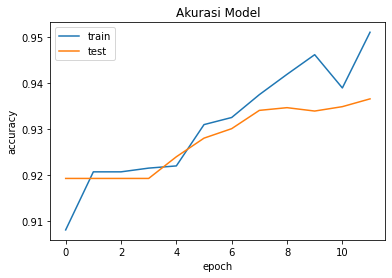

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

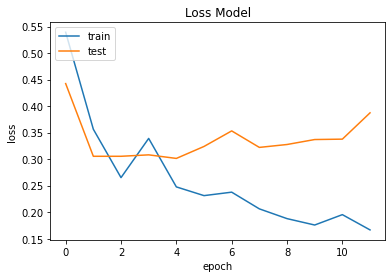

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()